In this project the Titanic project, which was previously solved using machine learning, is solved by keras and deep learning methods.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df1,df2=pd.read_csv("ttrain.csv"),pd.read_csv("ttest.csv")

In [3]:
df1.shape,df2.shape

((891, 12), (418, 11))

In [4]:
df1.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
352,353,0,3,"Elias, Mr. Tannous",male,15.0,1,1,2695,7.2292,NaN,C


In [5]:
df2.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.775,NaN,S


In [6]:
df = df1.append(df2)

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
df.shape

(1309, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [10]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
1014/1309

0.774637127578304

%77 of the Cabin column has NaN value. So we can remove this column.

In [12]:
df = df.drop(["Cabin"],axis=1)

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [14]:
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

NaN Fare rows filled with mean value. (Because Fare has integer values)

<AxesSubplot: xlabel='Embarked', ylabel='count'>

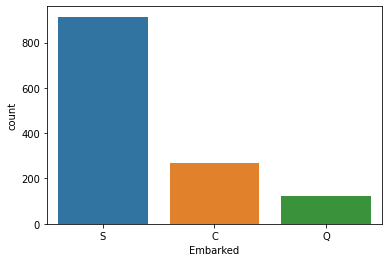

In [15]:
sns.countplot(x=df["Embarked"])

In [16]:
df["Embarked"].mode()

0    S
dtype: object

In [17]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())

In [18]:
df["Title"] = df["Name"].str.extract('([A-Za-z]+)\.', expand = False)

In [19]:
del df["Name"]

Titles matters, not names.

In [20]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,NaN,0,0,A.5. 3236,8.0500,S,Mr
414,1306,NaN,1,female,39.0,0,0,PC 17758,108.9000,C,Dona
415,1307,NaN,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
416,1308,NaN,3,male,NaN,0,0,359309,8.0500,S,Mr


In [21]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

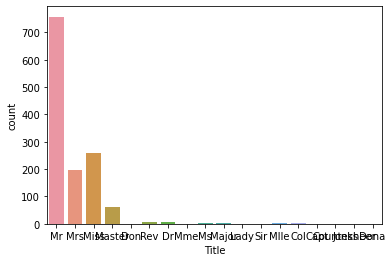

In [22]:
sns.countplot(x=df["Title"]);

In [23]:
df["Title"] = df["Title"].replace(["Ms","Mlle"],"Miss")
df["Title"] = df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs")
df["Title"]=df["Title"].replace(["Rev","Jonkheer","Don","Sir","Major","Dr","Capt","Col"],"Mr")

In [24]:
df["Title"].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [25]:
df.groupby('Title')['Age'].median()

Title
Master     4.0
Miss      22.0
Mr        30.0
Mrs       35.5
Name: Age, dtype: float64

In [26]:
df["Age"]=df["Age"].fillna(df.groupby("Title")["Age"].transform("median"))

In [27]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Title            0
dtype: int64

In [28]:
df["Family"] = df["SibSp"]+df["Parch"]+1

In [29]:
df.drop(["Ticket","SibSp","Parch"],axis=1, inplace=True)

In [30]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,1,0.0,3,male,22.0,7.2500,S,Mr,2
1,2,1.0,1,female,38.0,71.2833,C,Mrs,2
2,3,1.0,3,female,26.0,7.9250,S,Miss,1
3,4,1.0,1,female,35.0,53.1000,S,Mrs,2
4,5,0.0,3,male,35.0,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,30.0,8.0500,S,Mr,1
414,1306,NaN,1,female,39.0,108.9000,C,Mrs,1
415,1307,NaN,3,male,38.5,7.2500,S,Mr,1
416,1308,NaN,3,male,30.0,8.0500,S,Mr,1


In [31]:
data = pd.get_dummies(df,drop_first=True)

In [32]:
data

,PassengerId,Survived,Pclass,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,1,0.0,3,22.0,7.2500,2,1,0,1,0,1,0
1,2,1.0,1,38.0,71.2833,2,0,0,0,0,0,1
2,3,1.0,3,26.0,7.9250,1,0,0,1,1,0,0
3,4,1.0,1,35.0,53.1000,2,0,0,1,0,0,1
4,5,0.0,3,35.0,8.0500,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,30.0,8.0500,1,1,0,1,0,1,0
414,1306,NaN,1,39.0,108.9000,1,0,0,0,0,0,1
415,1307,NaN,3,38.5,7.2500,1,1,0,1,0,1,0
416,1308,NaN,3,30.0,8.0500,1,1,0,1,0,1,0


In [33]:
del df["PassengerId"]

In [34]:
train = data[:891]
test = data[891:]

In [35]:
train.shape , test.shape

((891, 12), (418, 12))

In [36]:
x,y = train.drop("Survived",axis=1) , train["Survived"]

In [37]:
x

,PassengerId,Pclass,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,1,3,22.0,7.2500,2,1,0,1,0,1,0
1,2,1,38.0,71.2833,2,0,0,0,0,0,1
2,3,3,26.0,7.9250,1,0,0,1,1,0,0
3,4,1,35.0,53.1000,2,0,0,1,0,0,1
4,5,3,35.0,8.0500,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,13.0000,1,1,0,1,0,1,0
887,888,1,19.0,30.0000,1,0,0,1,1,0,0
888,889,3,22.0,23.4500,4,0,0,1,1,0,0
889,890,1,26.0,30.0000,1,1,0,0,0,1,0


In [38]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [39]:
#!pip install tensorflow
#!pip install keras

In [40]:
def result_func(df,model,count):
    predict_x=model.predict(df[891:].drop("Survived",axis=1))
    result_dataset=pd.DataFrame()
    result_dataset["PassengerId"]=df[891:]["PassengerId"]
    result_dataset["Predict"]=predict_x
    result_dataset["Survived"]=result_dataset["Predict"].map(lambda s:1 if s>=0.5 else 0 )
    print(result_dataset["Survived"].value_counts().plot.bar())
    result_dataset.drop("Predict",axis=1).to_csv("titanic_deep_learning_result_model{}.csv".format(count),index=False)
    return result_dataset 

## Model 1

In [41]:
model=Sequential()
model.add(Dense(14,activation='relu'))   # first layer -> 14 neuron -> because x has 14 columns
model.add(Dense(10,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))   # last layer -> 1 neuron -> because it is classification

model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')
# optimizer = adam -> If the learning rate is high, it decreases, if it is low, it increases.

In [42]:
model.fit(x,y,epochs=150,batch_size=10,verbose=1)
# batch_size -> determines how many rows we take at a time
# verbose -> indicates that the model is working / verbose=0 -> we dont see the below process 

Epoch 1/150
90/90 [==============================] - 2s 3ms/step - loss: 0.7424 - accuracy: 0.5264
Epoch 2/150
90/90 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.6162
Epoch 3/150
90/90 [==============================] - 0s 5ms/step - loss: 0.6848 - accuracy: 0.6162
Epoch 4/150
90/90 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.6162
Epoch 5/150
90/90 [==============================] - 0s 3ms/step - loss: 0.6651 - accuracy: 0.6162
Epoch 6/150
90/90 [==============================] - 0s 4ms/step - loss: 0.6593 - accuracy: 0.6162
Epoch 7/150
90/90 [==============================] - 0s 4ms/step - loss: 0.6609 - accuracy: 0.6162
Epoch 8/150
90/90 [==============================] - 0s 4ms/step - loss: 0.6466 - accuracy: 0.6162
Epoch 9/150
90/90 [==============================] - 0s 4ms/step - loss: 0.6181 - accuracy: 0.6162
Epoch 10/150
90/90 [==============================] - 0s 5ms/step - loss: 0.6279 - accuracy: 0.6162
Epoch 11/

90/90 [==============================] - 0s 4ms/step - loss: 0.4437 - accuracy: 0.8081
Epoch 84/150
90/90 [==============================] - 0s 4ms/step - loss: 0.4545 - accuracy: 0.8081
Epoch 85/150
90/90 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.8081
Epoch 86/150
90/90 [==============================] - 0s 3ms/step - loss: 0.4513 - accuracy: 0.7935
Epoch 87/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.8002
Epoch 88/150
90/90 [==============================] - 0s 3ms/step - loss: 0.4480 - accuracy: 0.8013
Epoch 89/150
90/90 [==============================] - 0s 5ms/step - loss: 0.4466 - accuracy: 0.7957
Epoch 90/150
90/90 [==============================] - 0s 5ms/step - loss: 0.4446 - accuracy: 0.7969
Epoch 91/150
90/90 [==============================] - 0s 5ms/step - loss: 0.4340 - accuracy: 0.8047
Epoch 92/150
90/90 [==============================] - 0s 5ms/step - loss: 0.4368 - accuracy: 0.8126
Epoch 93/150


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 10)                150       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [44]:
scores = model.evaluate(x,y)

28/28 [==============================] - 0s 3ms/step - loss: 0.4029 - accuracy: 0.8148


In [45]:
scores[0]   # loss

0.4029079079627991

In [46]:
scores[1]   # accuracy

0.8148148059844971

In [47]:
df = pd.get_dummies(df,drop_first=True)

14/14 [==============================] - 0s 2ms/step
AxesSubplot(0.125,0.125;0.775x0.755)


,PassengerId,Predict,Survived
0,892,0.070544,0
1,893,0.444668,0
2,894,0.086174,0
3,895,0.066255,0
4,896,0.518983,1
...,...,...,...
413,1305,0.041766,0
414,1306,0.876987,1
415,1307,0.032398,0
416,1308,0.041872,0


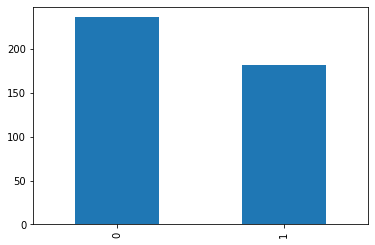

In [48]:
result_func(data,model,1)

In [49]:
history=model.fit(x,y,epochs=150,batch_size=10,verbose=1)
# validation _split -> no need to do train_test_split anymore

Epoch 1/150
90/90 [==============================] - 0s 5ms/step - loss: 0.4231 - accuracy: 0.8238
Epoch 2/150
90/90 [==============================] - 0s 5ms/step - loss: 0.4249 - accuracy: 0.8272
Epoch 3/150
90/90 [==============================] - 0s 5ms/step - loss: 0.4308 - accuracy: 0.8159
Epoch 4/150
90/90 [==============================] - 0s 5ms/step - loss: 0.4444 - accuracy: 0.8092
Epoch 5/150
90/90 [==============================] - 0s 5ms/step - loss: 0.4129 - accuracy: 0.8249
Epoch 6/150
90/90 [==============================] - 0s 4ms/step - loss: 0.4188 - accuracy: 0.8092
Epoch 7/150
90/90 [==============================] - 0s 4ms/step - loss: 0.4327 - accuracy: 0.8204
Epoch 8/150
90/90 [==============================] - 0s 4ms/step - loss: 0.4130 - accuracy: 0.8215
Epoch 9/150
90/90 [==============================] - 0s 5ms/step - loss: 0.4161 - accuracy: 0.8070
Epoch 10/150
90/90 [==============================] - 1s 6ms/step - loss: 0.4216 - accuracy: 0.8182
Epoch 11/

90/90 [==============================] - 0s 3ms/step - loss: 0.4104 - accuracy: 0.8193
Epoch 84/150
90/90 [==============================] - 0s 3ms/step - loss: 0.4106 - accuracy: 0.8193
Epoch 85/150
90/90 [==============================] - 0s 3ms/step - loss: 0.4027 - accuracy: 0.8182
Epoch 86/150
90/90 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.8137
Epoch 87/150
90/90 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.8182
Epoch 88/150
90/90 [==============================] - 0s 3ms/step - loss: 0.4009 - accuracy: 0.8137
Epoch 89/150
90/90 [==============================] - 0s 4ms/step - loss: 0.4120 - accuracy: 0.8272
Epoch 90/150
90/90 [==============================] - 1s 6ms/step - loss: 0.4185 - accuracy: 0.8182
Epoch 91/150
90/90 [==============================] - 0s 4ms/step - loss: 0.4166 - accuracy: 0.8182
Epoch 92/150
90/90 [==============================] - 0s 3ms/step - loss: 0.4001 - accuracy: 0.8193
Epoch 93/150


In [50]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


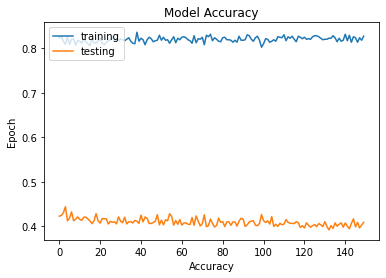

In [51]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

## Model 2

In [52]:
model=Sequential()
model.add(Dense(14,activation='relu')) 
model.add(Dense(9,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid')) 

model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [53]:
model.fit(x,y,validation_split=0.2,epochs=200,batch_size=10,verbose=2)

Epoch 1/200
72/72 - 2s - loss: 36.6216 - accuracy: 0.6096 - val_loss: 8.6851 - val_accuracy: 0.6425 - 2s/epoch - 22ms/step
Epoch 2/200
72/72 - 0s - loss: 0.9824 - accuracy: 0.5183 - val_loss: 0.7054 - val_accuracy: 0.3575 - 399ms/epoch - 6ms/step
Epoch 3/200
72/72 - 0s - loss: 0.6986 - accuracy: 0.4733 - val_loss: 0.7025 - val_accuracy: 0.3575 - 451ms/epoch - 6ms/step
Epoch 4/200
72/72 - 0s - loss: 0.6734 - accuracy: 0.4719 - val_loss: 0.6840 - val_accuracy: 0.3911 - 440ms/epoch - 6ms/step
Epoch 5/200
72/72 - 0s - loss: 0.6920 - accuracy: 0.4522 - val_loss: 0.6957 - val_accuracy: 0.3575 - 408ms/epoch - 6ms/step
Epoch 6/200
72/72 - 0s - loss: 0.6687 - accuracy: 0.4972 - val_loss: 0.6909 - val_accuracy: 0.6425 - 301ms/epoch - 4ms/step
Epoch 7/200
72/72 - 0s - loss: 0.6658 - accuracy: 0.6096 - val_loss: 0.6895 - val_accuracy: 0.6425 - 395ms/epoch - 5ms/step
Epoch 8/200
72/72 - 0s - loss: 0.6660 - accuracy: 0.6096 - val_loss: 0.6865 - val_accuracy: 0.6425 - 357ms/epoch - 5ms/step
Epoch 9/2

Epoch 67/200
72/72 - 0s - loss: 0.6637 - accuracy: 0.6096 - val_loss: 0.6661 - val_accuracy: 0.6425 - 263ms/epoch - 4ms/step
Epoch 68/200
72/72 - 0s - loss: 0.6450 - accuracy: 0.6096 - val_loss: 0.6651 - val_accuracy: 0.6425 - 280ms/epoch - 4ms/step
Epoch 69/200
72/72 - 0s - loss: 0.6316 - accuracy: 0.6096 - val_loss: 0.6633 - val_accuracy: 0.6425 - 276ms/epoch - 4ms/step
Epoch 70/200
72/72 - 0s - loss: 0.6466 - accuracy: 0.6096 - val_loss: 0.6618 - val_accuracy: 0.6425 - 280ms/epoch - 4ms/step
Epoch 71/200
72/72 - 0s - loss: 0.6331 - accuracy: 0.6096 - val_loss: 0.6665 - val_accuracy: 0.6425 - 433ms/epoch - 6ms/step
Epoch 72/200
72/72 - 0s - loss: 0.6266 - accuracy: 0.6096 - val_loss: 0.6526 - val_accuracy: 0.6425 - 326ms/epoch - 5ms/step
Epoch 73/200
72/72 - 0s - loss: 0.6282 - accuracy: 0.6096 - val_loss: 0.6701 - val_accuracy: 0.6425 - 342ms/epoch - 5ms/step
Epoch 74/200
72/72 - 0s - loss: 0.6323 - accuracy: 0.6096 - val_loss: 0.6684 - val_accuracy: 0.6425 - 329ms/epoch - 5ms/step


Epoch 133/200
72/72 - 0s - loss: 0.4760 - accuracy: 0.7949 - val_loss: 0.4624 - val_accuracy: 0.8045 - 274ms/epoch - 4ms/step
Epoch 134/200
72/72 - 0s - loss: 0.4787 - accuracy: 0.7823 - val_loss: 0.4173 - val_accuracy: 0.8101 - 273ms/epoch - 4ms/step
Epoch 135/200
72/72 - 0s - loss: 0.4846 - accuracy: 0.7809 - val_loss: 0.4371 - val_accuracy: 0.8156 - 271ms/epoch - 4ms/step
Epoch 136/200
72/72 - 0s - loss: 0.4880 - accuracy: 0.7851 - val_loss: 0.5906 - val_accuracy: 0.7486 - 272ms/epoch - 4ms/step
Epoch 137/200
72/72 - 0s - loss: 0.4694 - accuracy: 0.7978 - val_loss: 0.6449 - val_accuracy: 0.6480 - 410ms/epoch - 6ms/step
Epoch 138/200
72/72 - 0s - loss: 0.4801 - accuracy: 0.7921 - val_loss: 0.4196 - val_accuracy: 0.8045 - 385ms/epoch - 5ms/step
Epoch 139/200
72/72 - 0s - loss: 0.4691 - accuracy: 0.7978 - val_loss: 0.4133 - val_accuracy: 0.8212 - 402ms/epoch - 6ms/step
Epoch 140/200
72/72 - 0s - loss: 0.4678 - accuracy: 0.8076 - val_loss: 0.6474 - val_accuracy: 0.6369 - 379ms/epoch - 5

72/72 - 0s - loss: 0.4512 - accuracy: 0.8090 - val_loss: 0.4653 - val_accuracy: 0.7933 - 297ms/epoch - 4ms/step
Epoch 199/200
72/72 - 0s - loss: 0.4580 - accuracy: 0.8076 - val_loss: 0.3790 - val_accuracy: 0.8212 - 357ms/epoch - 5ms/step
Epoch 200/200
72/72 - 0s - loss: 0.4517 - accuracy: 0.7992 - val_loss: 0.3824 - val_accuracy: 0.8268 - 294ms/epoch - 4ms/step


In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 14)                168       
                                                                 
 dense_5 (Dense)             (None, 9)                 135       
                                                                 
 dense_6 (Dense)             (None, 4)                 40        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 348
Trainable params: 348
Non-trainable params: 0
_________________________________________________________________


In [55]:
scores=model.evaluate(x,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.8159


In [57]:
scores[0]    # loss

0.4256071150302887

In [58]:
scores[1]      # accuracy

0.8159371614456177

Better accuracy score compared to model 1. (proportional to epoch size)

14/14 [==============================] - 0s 2ms/step
AxesSubplot(0.125,0.125;0.775x0.755)


,PassengerId,Predict,Survived
0,892,0.062754,0
1,893,0.223904,0
2,894,0.027578,0
3,895,0.073515,0
4,896,0.471401,0
...,...,...,...
413,1305,0.049645,0
414,1306,0.815908,1
415,1307,0.031803,0
416,1308,0.049581,0


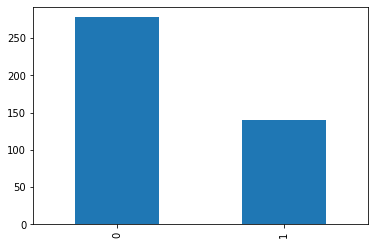

In [59]:
result_func(data,model,2)

In [60]:
history=model.fit(x,y,validation_split=0.2,epochs=200,batch_size=10,verbose=2)

Epoch 1/200
72/72 - 0s - loss: 0.4432 - accuracy: 0.7978 - val_loss: 0.4858 - val_accuracy: 0.7933 - 256ms/epoch - 4ms/step
Epoch 2/200
72/72 - 0s - loss: 0.4494 - accuracy: 0.8048 - val_loss: 0.4205 - val_accuracy: 0.8156 - 260ms/epoch - 4ms/step
Epoch 3/200
72/72 - 0s - loss: 0.4549 - accuracy: 0.8034 - val_loss: 0.6693 - val_accuracy: 0.6592 - 293ms/epoch - 4ms/step
Epoch 4/200
72/72 - 0s - loss: 0.4522 - accuracy: 0.8118 - val_loss: 0.5196 - val_accuracy: 0.7989 - 309ms/epoch - 4ms/step
Epoch 5/200
72/72 - 0s - loss: 0.4383 - accuracy: 0.8020 - val_loss: 0.5744 - val_accuracy: 0.7542 - 241ms/epoch - 3ms/step
Epoch 6/200
72/72 - 0s - loss: 0.4746 - accuracy: 0.8006 - val_loss: 0.3790 - val_accuracy: 0.8324 - 241ms/epoch - 3ms/step
Epoch 7/200
72/72 - 0s - loss: 0.4657 - accuracy: 0.8048 - val_loss: 0.3872 - val_accuracy: 0.8045 - 202ms/epoch - 3ms/step
Epoch 8/200
72/72 - 0s - loss: 0.4477 - accuracy: 0.8048 - val_loss: 0.4227 - val_accuracy: 0.8268 - 245ms/epoch - 3ms/step
Epoch 9/

Epoch 67/200
72/72 - 0s - loss: 0.4346 - accuracy: 0.8132 - val_loss: 0.4750 - val_accuracy: 0.7877 - 199ms/epoch - 3ms/step
Epoch 68/200
72/72 - 0s - loss: 0.4274 - accuracy: 0.8216 - val_loss: 0.4109 - val_accuracy: 0.7821 - 202ms/epoch - 3ms/step
Epoch 69/200
72/72 - 0s - loss: 0.4396 - accuracy: 0.8048 - val_loss: 0.3987 - val_accuracy: 0.8045 - 278ms/epoch - 4ms/step
Epoch 70/200
72/72 - 0s - loss: 0.4257 - accuracy: 0.8188 - val_loss: 0.3836 - val_accuracy: 0.8324 - 281ms/epoch - 4ms/step
Epoch 71/200
72/72 - 0s - loss: 0.4247 - accuracy: 0.8188 - val_loss: 0.5599 - val_accuracy: 0.7598 - 278ms/epoch - 4ms/step
Epoch 72/200
72/72 - 0s - loss: 0.4470 - accuracy: 0.8090 - val_loss: 0.3872 - val_accuracy: 0.8268 - 280ms/epoch - 4ms/step
Epoch 73/200
72/72 - 0s - loss: 0.4290 - accuracy: 0.8202 - val_loss: 0.3912 - val_accuracy: 0.8156 - 281ms/epoch - 4ms/step
Epoch 74/200
72/72 - 0s - loss: 0.4342 - accuracy: 0.8118 - val_loss: 0.3908 - val_accuracy: 0.7877 - 282ms/epoch - 4ms/step


Epoch 133/200
72/72 - 0s - loss: 0.4094 - accuracy: 0.8272 - val_loss: 0.3841 - val_accuracy: 0.8101 - 276ms/epoch - 4ms/step
Epoch 134/200
72/72 - 0s - loss: 0.4126 - accuracy: 0.8188 - val_loss: 0.4191 - val_accuracy: 0.8101 - 353ms/epoch - 5ms/step
Epoch 135/200
72/72 - 0s - loss: 0.4287 - accuracy: 0.8076 - val_loss: 0.4016 - val_accuracy: 0.7765 - 380ms/epoch - 5ms/step
Epoch 136/200
72/72 - 0s - loss: 0.4093 - accuracy: 0.8244 - val_loss: 0.4064 - val_accuracy: 0.7877 - 366ms/epoch - 5ms/step
Epoch 137/200
72/72 - 0s - loss: 0.4116 - accuracy: 0.8244 - val_loss: 0.4109 - val_accuracy: 0.7821 - 218ms/epoch - 3ms/step
Epoch 138/200
72/72 - 0s - loss: 0.4089 - accuracy: 0.8287 - val_loss: 0.4184 - val_accuracy: 0.7765 - 412ms/epoch - 6ms/step
Epoch 139/200
72/72 - 0s - loss: 0.4075 - accuracy: 0.8216 - val_loss: 0.3901 - val_accuracy: 0.8324 - 422ms/epoch - 6ms/step
Epoch 140/200
72/72 - 0s - loss: 0.4070 - accuracy: 0.8202 - val_loss: 0.3855 - val_accuracy: 0.8212 - 257ms/epoch - 4

72/72 - 0s - loss: 0.4257 - accuracy: 0.8230 - val_loss: 0.4364 - val_accuracy: 0.7989 - 237ms/epoch - 3ms/step
Epoch 199/200
72/72 - 0s - loss: 0.4147 - accuracy: 0.8329 - val_loss: 0.3953 - val_accuracy: 0.7821 - 276ms/epoch - 4ms/step
Epoch 200/200
72/72 - 0s - loss: 0.4094 - accuracy: 0.8244 - val_loss: 0.4272 - val_accuracy: 0.7989 - 278ms/epoch - 4ms/step


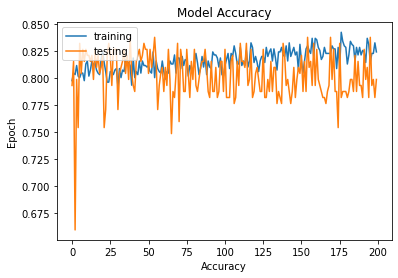

In [61]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

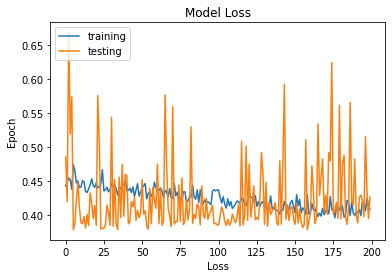

In [63]:
fig1=plt.figure(2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")